In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 4.1MB/s 
     |████████████████████████████████| 14.8MB 260kB/s 
     |████████████████████████████████| 6.5MB 40.3MB/s 


In [ ]:
pip install kneed

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import seaborn as sns
from scipy import stats
from kneed import KneeLocator
from shapely.geometry import Point, Polygon

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize, StandardScaler 
from sklearn import datasets 
from sklearn.metrics import silhouette_score


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from mlxtend.plotting import plot_decision_regions

# variable            type                 effect
# df                  pandas.DataFrame     dataframe in which to edit
# column_name         string               column name within passed dataframe to be edited 
# sort                boolean              true - will sort before enumerating, false - will not sort 
# function            string               cost function (nonlinear can only be used when sort is true) 

def mapToInt(df, column_name, sort, function):
    df[column_name] = df[column_name].astype(str)
    keys = list(df[column_name].unique())
    if(sort):
        keys = sorted(keys)
    dct = {}
    values = range(len(keys))
    j = 1
    for i in (keys):
        dct[i] = j
        if((function == 'linear')):
            j += 1
        elif((function == 'exp') & sort):
            j *= np.e
        elif((function == 'quadratic') & sort):
            j += 1 + (2 * j)
        else:
            raise ValueError('function is invalid')
    df[column_name] = df[column_name].replace(dct)
    return dct


In [ ]:
df = pd.read_csv('county_statistics.csv')
somedf = df.copy()
df['pctCases'] = (df['cases'] / df['TotalPop']) * 100
df['Winner'] = np.where(df.percentage16_Donald_Trump > df.percentage16_Hillary_Clinton, 0, 1)
pd.set_option('display.max_columns', None)
df = df.dropna()
df.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,pctCases,Winner
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,3.247539,0
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,5.082499,0
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,3.736297,0
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,4.010645,0
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,3.086763,0


In [ ]:
somedf = somedf.dropna()
somedf.describe()
dct_employ1 = mapToInt(somedf, 'county', True, 'linear')
dct_employ2 = mapToInt(somedf, 'state', True, 'linear')
somedf.head()
z = np.abs(stats.zscore(somedf))
clean_df = somedf[(z < 3).all(axis=1)]
clean_df
clean_df.set_index('county')
clean_df.describe()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,1544.772173,879.715427,25.962589,0.664288,0.288837,26937.076923,15433.868012,10133.279109,0.679482,0.303121,30308.223623,17563.973939,12178.820933,38.448738,-90.860262,1652.643968,32.391341,62462.405212,30858.277848,31604.127364,6.664271,81.930307,7.630601,0.904792,0.900420,0.051786,46484.327028,48957.979823,2867.262295,25641.941152,1373.063052,15.502606,21.597520,30.758722,17.885204,22.007650,12.516604,16.832493,81.294578,9.782051,0.526398,2.622488,1.387390,4.388398,23.537369,28651.389660,76.395166,15.893821,7.469525,0.243338,6.134720
std,901.365127,497.830137,13.842859,0.120820,0.115822,42087.118783,20189.150139,20998.285439,0.125661,0.123858,48699.760758,23425.377788,25940.542039,4.613742,10.594763,2853.863418,66.333398,97115.000338,47515.490936,49624.333640,8.358782,14.289103,11.485703,2.210688,1.081996,0.128293,70493.590496,10188.066265,1506.199790,4664.160152,719.668154,5.278833,8.583742,5.154139,2.998578,2.684388,3.379530,5.299664,4.371781,2.418373,0.777961,1.832058,0.798585,2.118545,5.065325,47049.291506,5.651329,4.664943,2.988105,0.240393,2.398502
min,0.000000,1.000000,1.000000,0.228000,0.050000,534.000000,460.000000,31.000000,0.205000,0.066000,282.000000,83.000000,70.000000,26.110920,-124.157282,0.000000,0.000000,1121.000000,560.000000,561.000000,0.000000,34.600000,0.000000,0.000000,0.000000,0.000000,855.000000,22736.000000,526.000000,11192.000000,248.000000,2.400000,0.400000,14.300000,8.200000,12.700000,4.800000,4.900000,61.900000,1.600000,0.000000,0.000000,0.000000,0.200000,9.600000,560.000000,54.000000,6.500000,1.700000,0.000000,0.400000
25%,756.000000,449.500000,15.000000,0.590000,0.203000,5810.000000,4014.000000,1301.500000,0.604000,0.208000,6220.500000,4432.500000,1452.000000,35.051429,-96.211467,276.000000,3.000000,13392.000000,6698.000000,6548.500000,2.000000,72.950000,0.600000,0.100000,0.300000,0.000000,10338.000000,41630.000000,1780.000000,22205.500000,858.500000,11.600000,15.300000,27.300000,15.800000,20.100000,10.100000,13.000000,78.800000,8.150000,0.100000,1.300000,0.800000,2.900000,19.900000,5509.500000,73.100000,12.400000,5.300000,0.100000,4.450000
50%,1547.000000,884.000000,24.000000,0.680000,0.271000,11939.000000,8012.000000,3166.000000,0.697000,0.284000,12947.000000,8878.000000,3554.000000,38.507358,-89.478093,676.000000,11.000000,27772.000000,13841.000000,13975.000000,3.500000,87.000000,2.000000,0.300000,0.600000,0.000000,20817.000000,47975.000000,2546.000000,25219.000000,1205.000000,15.100000,21.000000,30.200000,17.700000,22.200000,12.200000,16.500000,81.800000,9.500000,0.300000,2.200000,1.200000,4.000000,23.300000,11802.000000,77.000000,15.200000,6.800000,0.200000,6.000000
75%,2310.500000,1282.500000,38.000000,0.754000,0.360000,26833.000000,16941.500000,8419.500000,0.776000,0.378000,29348.500000,19388.0000



```
# This is formatted as code
```

#Logistic Regression

## Logistic Regression

In [ ]:
import sklearn as skl
import sklearn.linear_model as mod
import sklearn.model_selection 

df_logistic = pd.read_csv('trump_biden_polls.csv')

# add a minus to each element to modify sorting: (A) < (A+) < (A-), but (A+)- < (A)- < (A-)-
df_logistic['fte_grade'] = df_logistic['fte_grade'].astype(str) + '-'

# if you want items later in the sorted list to be penalized differently, enable sorting and change function
dct1 = mapToInt(df_logistic, 'fte_grade', True, 'linear')
dct2 = mapToInt(df_logistic, 'pollster', False, 'linear')
print(dct1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,22,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'A+-': 1, 'A-': 2, 'A--': 3, 'A/B-': 4, 'B+-': 5, 'B-': 6, 'B--': 7, 'B/C-': 8, 'C+-': 9, 'C-': 10, 'C--': 11, 'C/D-': 12, 'D--': 13, 'nan-': 14}


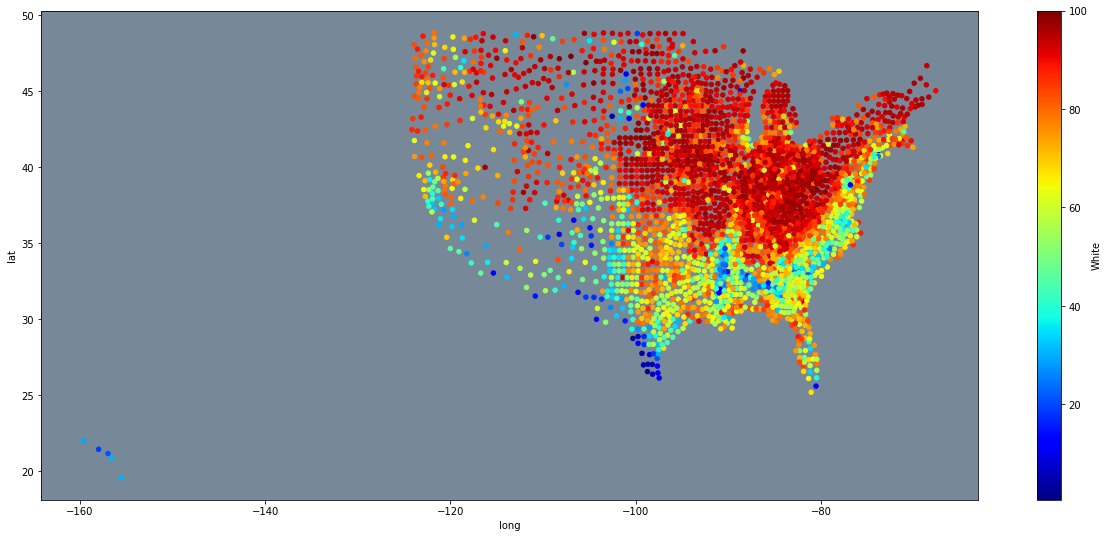

In [ ]:
df_logistic = pd.read_csv('county_statistics.csv')
df_logistic['modpop'] = np.sqrt(df_logistic['TotalPop']) / 10
df_logistic['Winner'] = np.where(df_logistic.percentage16_Donald_Trump > df_logistic.percentage16_Hillary_Clinton, 'Donny', 'Hil')
dct1 = mapToInt(df_logistic, 'Winner', False, 'linear')

fig, ax = plt.subplots()
df_logistic.plot(kind = 'scatter', x='long', y='lat', c='White', colormap='jet', ax=ax, figsize=(21,9))
ax.set_facecolor("lightslategray")

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,lat,long,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,modpop,Winner
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,4101.0,34.223334,-82.461707,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,0.0,19452.0,35254.0,2259.0,19234.0,799.0,22.7,32.1,27.2,20.7,20.8,10.6,20.7,78.3,11.1,0.5,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,15.744205,1
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,5443.0,30.295065,-92.414197,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,0.0,45197.0,40492.0,2544.0,21591.0,1002.0,21.5,27.6,27.6,16.9,25.7,15.0,14.8,83.2,10.3,0.2,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,25.021391,1
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,7578.0,37.767072,-75.632346,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,0.0,24408.0,42260.0,2253.0,24266.0,1564.0,19.8,31.8,31.1,17.7,18.8,15.1,17.3,80.0,10.6,0.5,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,18.121810,1
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,120539.0,43.452658,-116.241552,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,0.1,316189.0,60151.0,1294.0,31642.0,725.0,11.8,13.1,43.0,16.6,25.0,6.9,8.4,80.7,7.7,0.5,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,65.963399,1
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,1197.0,41.330756,-94.471059,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,0.0,5572.0,49477.0,2633.0,28861.0,2055.0,9.5,12.1,28.2,16.9,20.0,17.3,17.6,77.9,12.4,0.3,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,8.480566,1


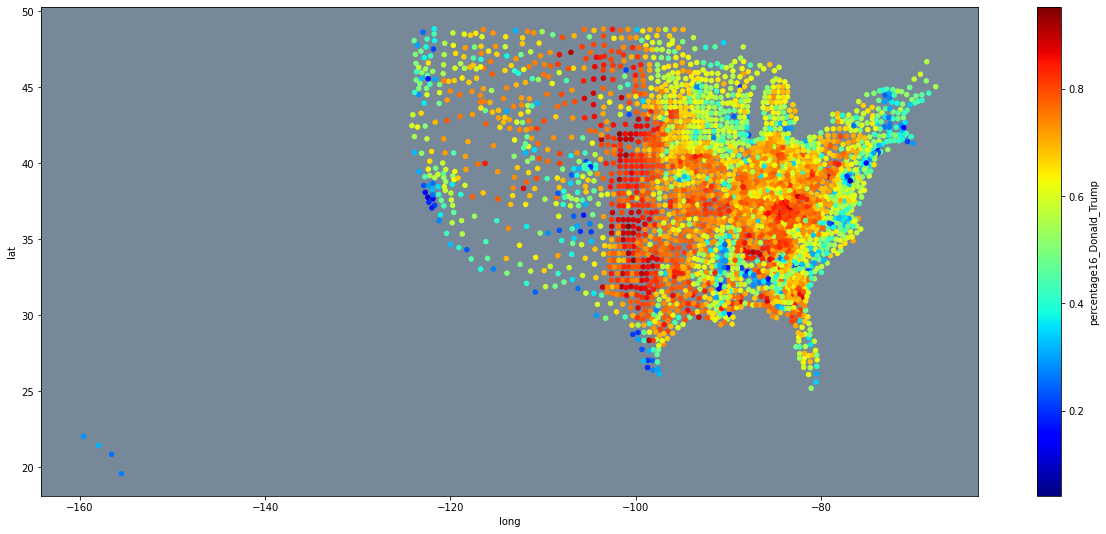

In [ ]:

fig2, ax2 = plt.subplots()
df_logistic.plot(kind = 'scatter', x='long', y='lat', c='percentage16_Donald_Trump', colormap='jet', ax=ax2, figsize=(21,9))
ax2.set_facecolor("lightslategray")
df_logistic.head()

Looking at both graphs above, there seems to be a trend between white voters and Donald Trump's percentages.

In [ ]:
import sklearn.linear_model as mod
from sklearn import model_selection
import seaborn as sns


# if you want items later in the sorted list to be penalized differently, change function
df_logistic.dropna(inplace=True)

lst = list(df_logistic)
start = lst.index('White')
end = lst.index('Black') + 1
print(lst[start:end])

# designate X and Y variables
X = df_logistic[lst[start:end]]
y = df_logistic['Winner']

# use scikit data splitting feature to randomly select testing and training sets
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.15)

# create and fit model
# this model attempts to predict the fte_score given a pollster
model = mod.LogisticRegression()
model.fit(X=X_train, y=y_train)
pred = model.predict(X=X_test)

pred = pred - 1
y_test = y_test - 1

print('accuracy:')
print(skl.metrics.accuracy_score(y_test, pred))

['White', 'Black']
accuracy:
0.8862144420131292


Below is the confusion matrix for this model

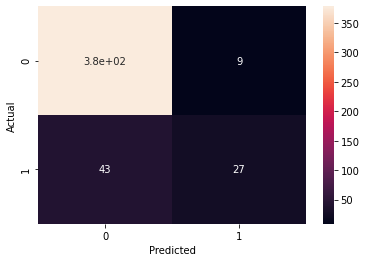

In [ ]:
ct = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(ct, annot = True)

In [ ]:
# if you want items later in the sorted list to be penalized differently, change function

lst = list(df_logistic)
start = lst.index('Hispanic')
end = lst.index('Pacific') + 1
print(lst[start:end])

# designate X and Y variables
X = df_logistic[lst[start:end]]
y = df_logistic['Winner']

# use scikit data splitting feature to randomly select testing and training sets
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.15)

# create and fit model
# this model attempts to predict the fte_score given a pollster
model = mod.LogisticRegression()
model.fit(X=X_train, y=y_train)
pred = model.predict(X=X_test)

pred = pred - 1
y_test = y_test - 1

print('accuracy:')
skl.metrics.accuracy_score(y_test, pred)

['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
accuracy:


0.9102844638949672

Below is the confusion matrix for this model

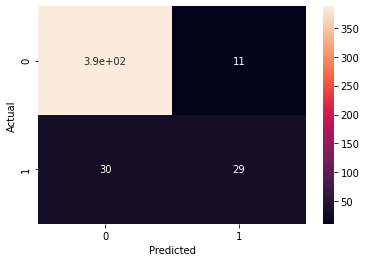

In [ ]:
ct = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(ct, annot = True)

Examining both models, it is clear that it is marginally better when including all races as features, but creating a model based on only black and white voters is very accurate as well; reinforcing the hypothesis that they have heavy correlation with a specific candidate.

I have not posted the exact percentages here as they will change due to the randomized test sample. The first model created is based only on black and white people and the second model is based on all races. 


# K-means Clustering

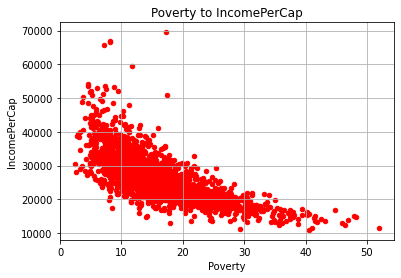

In [ ]:
feat_df = df[['IncomePerCap', 'Poverty', 'Winner']]
ax = feat_df.plot(kind='scatter', x='Poverty', y='IncomePerCap',title="Poverty to IncomePerCap", grid=True,fontsize=10, color="Red") 

In [ ]:
z = np.abs(stats.zscore(feat_df))
feat_df = feat_df[(z < 3).all(axis=1)]
feat_df

,IncomePerCap,Poverty,Winner
0,19234.0,22.7,0
1,21591.0,21.5,0
2,24266.0,19.8,0
3,31642.0,11.8,0
4,28861.0,9.5,0
...,...,...,...
3104,25661.0,16.5,0
3105,22814.0,18.5,0
3106,20600.0,19.7,0
3107,24789.0,14.3,0


In [ ]:
eda_df = feat_df[['IncomePerCap', 'Poverty']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(eda_df)
scaled_df = pd.DataFrame(scaled_features)
scaled_df.columns = eda_df.columns
scaled_df

,IncomePerCap,Poverty
0,-1.233353,1.187834
1,-0.787131,0.982198
2,-0.280706,0.690881
3,1.115703,-0.680023
4,0.589210,-1.074158
...,...,...
2962,-0.016607,0.125383
2963,-0.555595,0.468109
2964,-0.974745,0.673745
2965,-0.181692,-0.251615


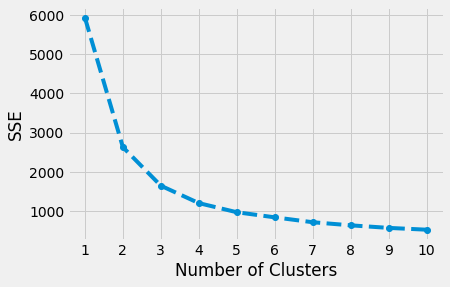

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, marker = 'o', linestyle = '--')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
k1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
k1.elbow

3

Text(0, 0.5, 'IncomePerCap')

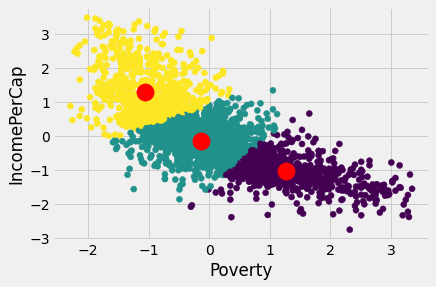

In [ ]:
kmeans = KMeans(init="random", n_clusters=k1.elbow, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_df)
pred = kmeans.fit_predict(scaled_df)
plt.scatter(scaled_df['Poverty'], scaled_df['IncomePerCap'], c=pred)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300)
plt.xlabel('Poverty')
plt.ylabel('IncomePerCap')

In [ ]:
kmeans_silhouette = silhouette_score(scaled_df, kmeans.labels_).round(2)
kmeans_silhouette

0.42

In [ ]:
scaled_df['Cluster'] = pred
scaled_df['Winner'] = feat_df['Winner']

donny_percent_high_income = len(scaled_df[(scaled_df['Cluster'] == 0) & (scaled_df['Winner'] == 0)]) / len(scaled_df[scaled_df['Cluster'] == 0])
hilly_percent_high_income = 1 - donny_percent_high_income
donny_percent_middle_income = len(scaled_df[(scaled_df['Cluster'] == 1) & (scaled_df['Winner'] == 0)]) / len(scaled_df[scaled_df['Cluster'] == 1])
hilly_percent_middle_income = 1 - donny_percent_middle_income
donny_percent_low_income = len(scaled_df[(scaled_df['Cluster'] == 2) & (scaled_df['Winner'] == 0)]) / len(scaled_df[scaled_df['Cluster'] == 2])
hilly_percent_low_income = 1 - donny_percent_low_income

print('% of High Class Counties that voted Donald Trump = ', donny_percent_high_income)
print('% of High Class Counties that voted Hillary Clinton = ', hilly_percent_high_income)

print('% of Middle Class Counties that voted Donald Trump = ', donny_percent_middle_income)
print('% of Middle Class Counties that voted Hillary Clinton = ', hilly_percent_middle_income)

print('% of Low Class Counties that voted Donald Trump = ', donny_percent_low_income)
print('% of Low Class Counties that voted Hillary Clinton = ', hilly_percent_low_income)

% of High Class Counties that voted Donald Trump =  0.8155467720685112
% of High Class Counties that voted Hillary Clinton =  0.18445322793148877
% of Middle Class Counties that voted Donald Trump =  0.8273431994362227
% of Middle Class Counties that voted Hillary Clinton =  0.1726568005637773
% of Low Class Counties that voted Donald Trump =  0.844106463878327
% of Low Class Counties that voted Hillary Clinton =  0.155893536121673


#K Nearest Neighbors#

In [ ]:
np.random.seed(42)
knn_df_copy = clean_df.copy()
knn_df_copy.head()
knn_df_copy['Winner'] = np.where(clean_df.percentage16_Donald_Trump > clean_df.percentage16_Hillary_Clinton, '0', '1')
knn_df = knn_df_copy[['Winner','Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Employed', 'Professional','Service', 'Office','Construction','Production']]
knn_df.head()

,Winner,Hispanic,White,Black,Native,Asian,Pacific,Employed,Professional,Service,Office,Construction,Production
0,0,1.3,68.9,27.6,0.1,0.3,0.0,9505.0,27.2,20.7,20.8,10.6,20.7
1,0,2.4,77.5,17.6,0.1,0.1,0.0,24982.0,27.6,16.9,25.7,15.0,14.8
2,0,8.8,60.3,28.3,0.3,0.7,0.0,13837.0,31.1,17.7,18.8,15.1,17.3
3,0,7.9,85.2,1.2,0.4,2.6,0.1,214984.0,43.0,16.6,25.0,6.9,8.4
4,0,1.7,96.6,0.3,0.0,0.4,0.0,3680.0,28.2,16.9,20.0,17.3,17.6


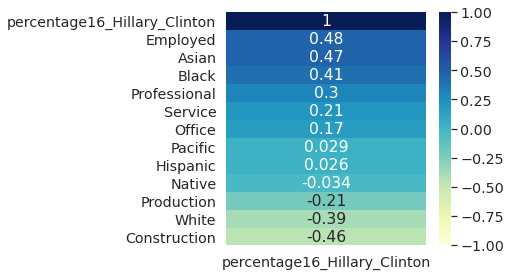

In [ ]:
correlation_df = clean_df[['percentage16_Hillary_Clinton','Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Employed', 'Professional','Service', 'Office','Construction','Production']]
sns.set(font_scale= 1.3)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(correlation_df.corr()[['percentage16_Hillary_Clinton']].sort_values('percentage16_Hillary_Clinton').tail(100),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

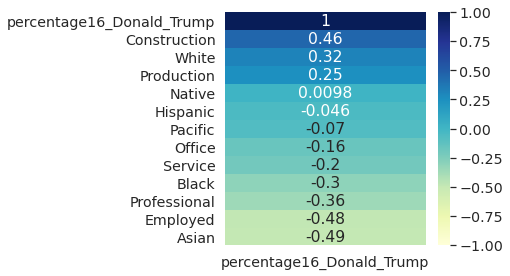

In [ ]:
correlation_df = clean_df[['percentage16_Donald_Trump','Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Employed', 'Professional','Service', 'Office','Construction','Production']]
sns.set(font_scale= 1.3)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(correlation_df.corr()[['percentage16_Donald_Trump']].sort_values('percentage16_Donald_Trump').tail(100),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [ ]:
data = knn_df.copy()
data.head()

,Winner,Hispanic,White,Black,Native,Asian,Pacific,Employed,Professional,Service,Office,Construction,Production
0,0,1.3,68.9,27.6,0.1,0.3,0.0,9505.0,27.2,20.7,20.8,10.6,20.7
1,0,2.4,77.5,17.6,0.1,0.1,0.0,24982.0,27.6,16.9,25.7,15.0,14.8
2,0,8.8,60.3,28.3,0.3,0.7,0.0,13837.0,31.1,17.7,18.8,15.1,17.3
3,0,7.9,85.2,1.2,0.4,2.6,0.1,214984.0,43.0,16.6,25.0,6.9,8.4
4,0,1.7,96.6,0.3,0.0,0.4,0.0,3680.0,28.2,16.9,20.0,17.3,17.6


In [ ]:
lst = list(data)
start = lst.index('Hispanic')
end = lst.index('Production') + 1
print(lst[start:end])
data['Winner'] =  data['Winner'].astype(int)

['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Employed', 'Professional', 'Service', 'Office', 'Construction', 'Production']


In [ ]:
X = data[lst[start:end]]
y = data['Winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))

21.817424229271428

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=21,p=2,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
y_train_knn_predict = cross_val_predict(classifier, X_train, y_train, cv=5)
f1_score(y_train, y_train_knn_predict)


0.29946524064171126

In [ ]:
y_pred =  classifier.predict(X_test)

True positive =  439
False positive =  0
False negative =  30
True negative =  7


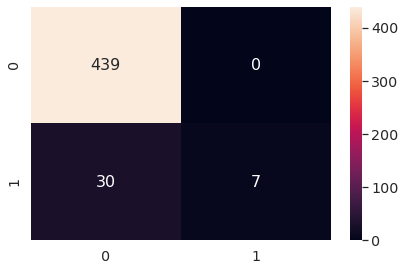

In [ ]:
cm= confusion_matrix(y_test,y_pred)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
sns.heatmap(cm, annot=True, annot_kws = {"size": 16}, fmt='g')

In [ ]:
f1_score(y_test,y_pred)

0.3181818181818182

In [ ]:
accuracy_score(y_test,y_pred)

0.9369747899159664

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
 recall_score(y_test,y_pred)

0.1891891891891892

In [ ]:
y_test_pred = pd.DataFrame(data={'Test': y_test, 'Predict': y_pred})
y_test_pred

,Test,Predict
1464,0,0
912,0,0
1333,1,0
2610,1,1
1752,0,0
...,...,...
451,0,0
3070,0,0
1834,0,0
1320,0,0


In [ ]:
print("y_train size ", y_train.size, "y_pred ", y_pred.size, "y_test size: ", y_test.size)

y_train size  1903 y_pred  476 y_test size:  476


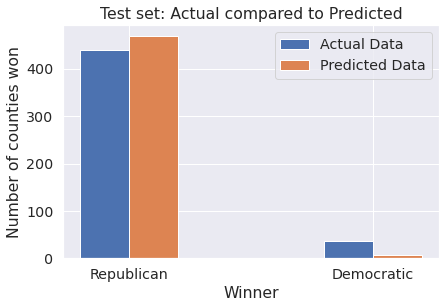

In [ ]:
fig, ax = plt.subplots()
ax.bar([0,.5], y_test_pred['Test'].value_counts(), label='Actual Data', width = .1)
ax.bar([0.1,.6], y_test_pred['Predict'].value_counts(), label= "Predicted Data", width = .1)
plt.xticks([0.05,.55], ["Republican", "Democratic"])
plt.ylabel('Number of counties won')
plt.xlabel('Winner')
plt.title('Test set: Actual compared to Predicted')
plt.legend()
plt.show()

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

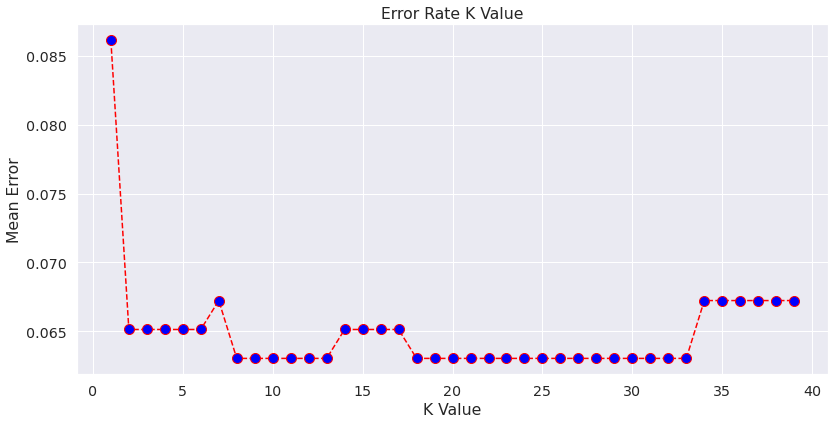

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')